# Examen Módulo 1

### Diplomado en Ciencia de Datos

### Aldo Alejandro Gallegos Ruiz

# Importación de Librerías

In [1]:

import json
import numpy as np
import pandas as pd 
import os
import glob
from datetime import datetime 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from varclushi import VarClusHi
import seaborn as sns

import cufflinks as cf
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from scipy.stats import ks_2samp
from varclushi import VarClusHi

cf.go_offline()
pd.set_option('display.max_columns', None)

/tmp/ipykernel_5544/3249573830.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Importar las funciones realizadas con anterioridad
from modulo1_examen_Libreria import examen
f = examen()

# Carga de datos

In [3]:
directorio = '/home/aldogruiz/diplo/datos_examen_modulo1/datos-20240326T235420Z-001/datos'

patron_csv = '*.csv'

dataframes_csv = []

for archivo in glob.glob(os.path.join(directorio, patron_csv)):

    nombre_archivo = os.path.splitext(os.path.basename(archivo))[0]

    df = pd.read_csv(archivo)
    globals()[nombre_archivo] = df

## Información

In [4]:
users

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,U1134,22.149654,-100.998610,false,casual drinker,no preference,family,public,single,independent,1991,variety,hard-worker,Catholic,student,black,52,medium,1.65
134,U1135,22.170396,-100.949936,false,casual drinker,informal,family,on foot,single,kids,1988,variety,hunter-ostentatious,Catholic,student,purple,66,low,1.54
135,U1136,22.149607,-100.997235,true,social drinker,no preference,friends,car owner,single,independent,1990,retro,thrifty-protector,Catholic,student,black,50,low,1.60
136,U1137,22.144803,-100.944623,false,social drinker,formal,family,public,single,independent,1989,eco-friendly,hard-worker,Catholic,student,blue,72,low,1.78


In [5]:
cuisine

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food
...,...,...
911,132005,Seafood
912,132004,Seafood
913,132003,International
914,132002,Seafood


In [6]:
hours

,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;
...,...,...,...
2334,132012,12:00-22:00;,Sun;
2335,132012,12:00-22:00;,Mon;Tue;Wed;Thu;Fri;
2336,132012,12:00-22:00;,Mon;Tue;Wed;Thu;Fri;
2337,132012,12:00-22:00;,Sat;


In [7]:
parking

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none
...,...,...
697,132024,street
698,132023,fee
699,132023,public
700,132012,public


In [8]:
payment_methods

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards
...,...,...
1309,132012,Diners_Club
1310,132002,MasterCard-Eurocard
1311,132002,Visa
1312,132002,American_Express


In [9]:
ratings

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [10]:
restaurants

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,zip,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,?,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,78280,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,78000,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,?,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,?,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,132866,22.141220,-100.931311,0101000020957F000013871838EC4A58C1B5DF74F8E396...,Chaires,Ricardo B. Anaya,San Luis Potosi,San Luis Potosi,Mexico,?,?,No_Alcohol_Served,not permitted,informal,completely,medium,?,familiar,f,closed,none
126,135072,22.149192,-101.002936,0101000020957F0000E7B79B1DB94758C1D29BC363D8AA...,Sushi Itto,Venustiano Carranza 1809 C Polanco,San Luis Potosi,SLP,Mexico,?,78220,No_Alcohol_Served,none,informal,no_accessibility,medium,sushi-itto.com.mx,familiar,f,closed,none
127,135109,18.921785,-99.235350,0101000020957F0000A6BF695F136F5AC1DADF87B20556...,Paniroles,?,?,?,?,?,?,Wine-Beer,not permitted,informal,no_accessibility,medium,?,quiet,f,closed,Internet
128,135019,18.875011,-99.159422,0101000020957F0000B49B2E5C6E785AC12F9D58435241...,Restaurant Bar Coty y Pablo,Paseo de Las Fuentes 24 Pedregal de Las Fuentes,Jiutepec,Morelos,Mexico,?,?,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,closed,none


Renombrar nombres del país estados y ciudades

In [11]:
restaurants['state'].replace({'SLP': 'San Luis Potosí', 'san luis potosi': 'San Luis Potosí', 'slp':'San Luis Potosí',
                              'S.L.P.':'San Luis Potosí','s.l.p.':'San Luis Potosí','san luis potos':'San Luis Potosí','San Luis Potosi':'San Luis Potosí',
                              'tamaulipas':'Tamaulipas',
                              'morelos':'Morelos',
                              'mexico':'CDMX'}, 
                             inplace=True)
restaurants['country'].replace({'Mexico': 'México','mexico':'México'}, 
                             inplace=True)
restaurants['city'].replace({'San Luis Potosi': 'San Luis Potosí','san luis potosí':'San Luis Potosí','s.l.p.':'San Luis Potosí',
                             'slp':'San Luis Potosí','san luis potos':'San Luis Potosí','san luis potosi':'San Luis Potosí','s.l.p':'San Luis Potosí',
                             'victoria':'Ciudad Victoria','Cd Victoria':'Ciudad Victoria','Cd. Victoria':'Ciudad Victoria',
                             'cuernavaca':'Cuernavaca'}, 
                             inplace=True)

/tmp/ipykernel_5544/2033861038.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_5544/2033861038.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or

In [12]:
usercuisine

,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch
...,...,...
325,U1135,Southern
326,U1135,Dessert-Ice_Cream
327,U1136,Mexican
328,U1137,Mexican


In [13]:
userpayment

,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards
...,...,...
172,U1134,cash
173,U1135,cash
174,U1136,cash
175,U1137,cash


# Unidad muestral

La unidad muestfral será la opnióon que cada cliente tiene de los restaurantes

In [14]:
ratings['ratingID']=ratings.index+1
ratings

,userID,placeID,rating,food_rating,service_rating,ratingID
0,U1077,135085,2,2,2,1
1,U1077,135038,2,2,1,2
2,U1077,132825,2,2,2,3
3,U1077,135060,1,2,2,4
4,U1068,135104,1,1,2,5
...,...,...,...,...,...,...
1156,U1043,132630,1,1,1,1157
1157,U1011,132715,1,1,0,1158
1158,U1068,132733,1,1,0,1159
1159,U1068,132594,1,1,1,1160


# Variable objetivo

Dado que tenemos la calificaión que el cliente otorgó a cada restaurnate, podemos establecer como variable objetivo el si le gustó o no el resturante, basándonos en las calificaciones que otorgó

In [15]:
ratings['target']=(((ratings['rating']+ratings['food_rating']+ratings['service_rating'])/3)>1.5)*1

# Ingeniería de Características

A partir de las calificaciones que otogaron los clientes nos interesa saber el promedio de las calificaciones de los clientes en los tres ámbitos, además de la calificacion media y máxima que recibió cada restaurante

In [16]:
func=['mean','max']
cols=['rating','food_rating','service_rating']
column_names = {} 

for i in func:
    column_names[i] = 'rating_'+i 

promedios_por_restaurante=ratings.groupby('placeID')['rating'].agg(func).reset_index()
promedios_por_restaurante.rename(columns=column_names, inplace=True)

promedios_por_cliente = ratings.groupby('userID')[cols].mean().reset_index()
columnas_promedio = promedios_por_cliente.columns[1:] 

for columna in columnas_promedio:
    promedios_por_cliente.rename(columns={columna: columna + '_prom'}, inplace=True)



In [17]:
promedios_por_restaurante

,placeID,rating_mean,rating_max
0,132560,0.500000,1
1,132561,0.750000,1
2,132564,1.250000,2
3,132572,1.000000,2
4,132583,1.000000,2
...,...,...,...
125,135088,1.000000,2
126,135104,0.857143,2
127,135106,1.200000,2
128,135108,1.181818,2


In [18]:
promedios_por_cliente

,userID,rating_prom,food_rating_prom,service_rating_prom
0,U1001,1.111111,1.222222,1.222222
1,U1002,1.400000,1.400000,1.000000
2,U1003,1.615385,1.692308,1.461538
3,U1004,1.875000,1.875000,1.750000
4,U1005,1.333333,1.444444,1.000000
...,...,...,...,...
133,U1134,1.437500,1.187500,1.187500
134,U1135,0.000000,0.000000,0.000000
135,U1136,1.600000,1.700000,1.800000
136,U1137,1.857143,1.785714,1.928571


In [19]:
ratings = ratings.merge(promedios_por_restaurante, on='placeID') \
    .merge(promedios_por_cliente, on='userID', suffixes=['', '_promedio'])

In [20]:
ratings

,userID,placeID,rating,food_rating,service_rating,ratingID,target,rating_mean,rating_max,rating_prom,food_rating_prom,service_rating_prom
0,U1077,135085,2,2,2,1,1,1.333333,2,1.400000,1.800000,1.600000
1,U1077,135038,2,2,1,2,1,1.208333,2,1.400000,1.800000,1.600000
2,U1077,132825,2,2,2,3,1,1.281250,2,1.400000,1.800000,1.600000
3,U1077,135060,1,2,2,4,1,1.136364,2,1.400000,1.800000,1.600000
4,U1068,135104,1,1,2,5,0,0.857143,2,0.625000,0.625000,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,U1043,132630,1,1,1,1157,0,1.166667,2,1.000000,1.200000,1.000000
1157,U1011,132715,1,1,0,1158,0,1.000000,2,1.333333,1.333333,0.666667
1158,U1068,132733,1,1,0,1159,0,1.300000,2,0.625000,0.625000,0.625000
1159,U1068,132594,1,1,1,1160,0,0.600000,1,0.625000,0.625000,0.625000


# Tabla unificada

Renombrar columnas para evitar duplicados

In [21]:
users.rename(columns={'latitude': 'latitude_users', 'longitude': 'longitude_users','Rcuisine':'Rcuisine_users'}, inplace=True)
restaurants.rename(columns={'latitude': 'latitude_restaurants', 'longitude': 'longitude_restaurants'}, inplace=True)
cuisine.rename(columns={'Rcuisine':'Rcuisine_cuisine'}, inplace=True)

In [22]:
merged_df = ratings.merge(users, on='userID', how='left') \
                  .merge(userpayment, on='userID', how='left') \
                  .merge(usercuisine, on='userID', how='left')

In [23]:
merged_df=merged_df.merge(restaurants, on='placeID', how='left') \
                  .merge(payment_methods, on='placeID', how='left') \
                  .merge(parking, on='placeID', how='left') \
                  .merge(hours, on='placeID', how='left') \
                    .merge(cuisine, on='placeID', how='left')

In [24]:
merged_df

,userID,placeID,rating,food_rating,service_rating,ratingID,target,rating_mean,rating_max,rating_prom,food_rating_prom,service_rating_prom,latitude_users,longitude_users,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,Upayment,Rcuisine,latitude_restaurants,longitude_restaurants,the_geom_meter,name,address,city,state,country,fax,zip,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services,Rpayment,parking_lot,hours,days,Rcuisine_cuisine
0,U1077,135085,2,2,2,1,1,1.333333,2,1.400,1.800,1.600,22.156469,-100.985540,false,social drinker,elegant,family,public,married,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71,VISA,Mexican,22.150802,-100.982680,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,San Luis Potosí,San Luis Potosí,México,?,78000,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none,cash,public,00:00-00:00;,Mon;Tue;Wed;Thu;Fri;,Fast_Food
1,U1077,135085,2,2,2,1,1,1.333333,2,1.400,1.800,1.600,22.156469,-100.985540,false,social drinker,elegant,family,public,married,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71,VISA,Mexican,22.150802,-100.982680,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,San Luis Potosí,San Luis Potosí,México,?,78000,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none,cash,public,00:00-00:00;,Sat;,Fast_Food
2,U1077,135085,2,2,2,1,1,1.333333,2,1.400,1.800,1.600,22.156469,-100.985540,false,social drinker,elegant,family,public,married,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71,VISA,Mexican,22.150802,-100.982680,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,San Luis Potosí,San Luis Potosí,México,?,78000,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none,cash,public,00:00-00:00;,Sun;,Fast_Food
3,U1077,135085,2,2,2,1,1,1.333333,2,1.400,1.800,1.600,22.156469,-100.985540,false,social drinker,elegant,family,public,married,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71,cash,Mexican,22.150802,-100.982680,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,San Luis Potosí,San Luis Potosí,México,?,78000,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none,cash,public,00:00-00:00;,Mon;Tue;Wed;Thu;Fri;,Fast_Food
4,U1077,135085,2,2,2,1,1,1.333333,2,1.400,1.800,1.600,22.156469,-100.985540,false,social drinker,elegant,family,public,married,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71,cash,Mexican,22.150802,-100.982680,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,San Luis Potosí,San Luis Potosí,México,?,78000,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none,cash,public,00:00-00:00;,Sat;,Fast_Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31554,U1068,132594,1,1,1,1160,0,0.600000,1,0.625,0.625,0.625,23.752269,-99.168605,false,casual drinker,informal,friends,public,single,independent,1988,technology,thrifty-protector,Catholic,student,blue,72,low,1.57,cash,Mexican,23.752168,-99.165709,0101000020957F00003AE4C6DBF48157C1CE38ECC1864E...,tacos de barbacoa enfrente del Tec,?,?,?,?,?,?,No_Alcohol_Served,not permitted,informal,completely,low,?,familiar,f,open,none,cash,public,09:00-23:30;,Sat;,Mexican
31555,U1068,132594,1,1,1,1160,0,0.600000,1,0.625,0.625,0.625,23.752269,-99.168605,false,casual d

### DataFrame final

In [25]:
df=merged_df[['ratingID','userID','placeID', 'rating', 'food_rating', 'service_rating',
       'rating_mean', 'rating_max', 'rating_prom',
       'food_rating_prom', 'service_rating_prom', 'latitude_users',
       'longitude_users', 'smoker', 'drink_level', 'dress_preference',
       'ambience', 'transport', 'marital_status', 'hijos', 'birth_year',
       'interest', 'personality', 'religion', 'activity', 'color', 'weight',
       'budget', 'height', 'Upayment', 'Rcuisine', 'latitude_restaurants',
       'longitude_restaurants', 'the_geom_meter', 'name', 'address', 'city',
       'state', 'country', 'fax', 'zip', 'alcohol', 'smoking_area',
       'dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise',
       'area', 'other_services', 'Rpayment', 'parking_lot', 'hours', 'days',
       'Rcuisine_cuisine','target']]

# Limpieza de datos

## Detección y remoción de variables poco pobladas.

## Pasar "?" a NaN

In [26]:
df.replace('?', np.nan, inplace=True)

/tmp/ipykernel_5544/333025894.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Observamos que solo hay dos variables que tinen menos del 50% de información

In [27]:
completitud=f.chequear_completitud(df)
completitud=completitud[completitud['Completitud (%)']>50]['Columna'].to_list()
completitud

/home/aldogruiz/diplo/datos_examen_modulo1/modulo1_examen_Libreria.py:98: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



['ratingID',
 'userID',
 'placeID',
 'rating',
 'food_rating',
 'service_rating',
 'rating_mean',
 'rating_max',
 'rating_prom',
 'food_rating_prom',
 'service_rating_prom',
 'latitude_users',
 'longitude_users',
 'smoker',
 'drink_level',
 'dress_preference',
 'ambience',
 'transport',
 'marital_status',
 'hijos',
 'birth_year',
 'interest',
 'personality',
 'religion',
 'activity',
 'color',
 'weight',
 'budget',
 'height',
 'Upayment',
 'Rcuisine',
 'latitude_restaurants',
 'longitude_restaurants',
 'the_geom_meter',
 'name',
 'address',
 'city',
 'state',
 'country',
 'zip',
 'alcohol',
 'smoking_area',
 'dress_code',
 'accessibility',
 'price',
 'Rambience',
 'franchise',
 'area',
 'other_services',
 'Rpayment',
 'parking_lot',
 'hours',
 'days',
 'Rcuisine_cuisine',
 'target']

In [28]:
df=df[completitud]

In [29]:
df.dtypes

ratingID                   int64
userID                    object
placeID                    int64
rating                     int64
food_rating                int64
service_rating             int64
rating_mean              float64
rating_max                 int64
rating_prom              float64
food_rating_prom         float64
service_rating_prom      float64
latitude_users           float64
longitude_users          float64
smoker                    object
drink_level               object
dress_preference          object
ambience                  object
transport                 object
marital_status            object
hijos                     object
birth_year                 int64
interest                  object
personality               object
religion                  object
activity                  object
color                     object
weight                     int64
budget                    object
height                   float64
Upayment                  object
Rcuisine  

# Variables continuas y discretas

In [30]:
userID=['userID']
um=['ratingID']
tgt=['target']
vard=df.select_dtypes(include=['object']).columns.tolist()
vard=vard[1:]
varc = [col for col in df.columns if col not in vard] 
varc=varc[3:-1]

In [31]:
varc

['rating',
 'food_rating',
 'service_rating',
 'rating_mean',
 'rating_max',
 'rating_prom',
 'food_rating_prom',
 'service_rating_prom',
 'latitude_users',
 'longitude_users',
 'birth_year',
 'weight',
 'height',
 'latitude_restaurants',
 'longitude_restaurants']

In [32]:
vard

['smoker',
 'drink_level',
 'dress_preference',
 'ambience',
 'transport',
 'marital_status',
 'hijos',
 'interest',
 'personality',
 'religion',
 'activity',
 'color',
 'budget',
 'Upayment',
 'Rcuisine',
 'the_geom_meter',
 'name',
 'address',
 'city',
 'state',
 'country',
 'zip',
 'alcohol',
 'smoking_area',
 'dress_code',
 'accessibility',
 'price',
 'Rambience',
 'franchise',
 'area',
 'other_services',
 'Rpayment',
 'parking_lot',
 'hours',
 'days',
 'Rcuisine_cuisine']

## Imputacion de los valores ausentes

Imputacion por media para las variables continuas

In [33]:
imputador_media = SimpleImputer(strategy='mean')
df[varc]=imputador_media.fit_transform(df[varc])

Imputacion por moda para las variables discretas


In [34]:
imputador_moda = SimpleImputer(strategy='most_frequent')
df[vard]=imputador_moda.fit_transform(df[vard])

Crear un DataFrame para mostrar el resultado p-value de la prueba KS


In [35]:
lista = []
for i in varc+vard:
    resultado_ks = ks_2samp(df[i].dropna(), df[i])
    lista.append([i,resultado_ks.pvalue])

In [36]:
resultado_df = pd.DataFrame(lista)

In [37]:
resultado_df

,0,1
0,rating,1.0
1,food_rating,1.0
2,service_rating,1.0
3,rating_mean,1.0
4,rating_max,1.0
5,rating_prom,1.0
6,food_rating_prom,1.0
7,service_rating_prom,1.0
8,latitude_users,1.0
9,longitude_users,1.0


In [38]:
df = df.dropna()

# Remosión de variables unarias

El dataframe no cuneta con variables unarias

In [39]:
num_valores_unicos = df.nunique()

In [40]:
# Obtener las columnas con más de un valor único
columnas_a_mantener = num_valores_unicos[num_valores_unicos > 1].index
columnas_a_mantener

Index(['ratingID', 'userID', 'placeID', 'rating', 'food_rating',
       'service_rating', 'rating_mean', 'rating_max', 'rating_prom',
       'food_rating_prom', 'service_rating_prom', 'latitude_users',
       'longitude_users', 'smoker', 'drink_level', 'dress_preference',
       'ambience', 'transport', 'marital_status', 'hijos', 'birth_year',
       'interest', 'personality', 'religion', 'activity', 'color', 'weight',
       'budget', 'height', 'Upayment', 'Rcuisine', 'latitude_restaurants',
       'longitude_restaurants', 'the_geom_meter', 'name', 'address', 'city',
       'state', 'zip', 'alcohol', 'smoking_area', 'dress_code',
       'accessibility', 'price', 'Rambience', 'franchise', 'area',
       'other_services', 'Rpayment', 'parking_lot', 'hours', 'days',
       'Rcuisine_cuisine', 'target'],
      dtype='object')

In [41]:
# Mantener solo las columnas con más de un valor único
df_unaria = df[columnas_a_mantener]

In [42]:
df.shape, df_unaria.shape

((31559, 55), (31559, 54))

In [43]:
df=df_unaria.copy()

### Convertir variables categóricas en numéricas

In [44]:
# la lista to_numeric son aquellos campos que podemos convertir de string a numérica
# hay campos con el nombre del restauranteo o su dirección, que no resulta práctico el convertir a numérico
to_numeric=['smoker', 'drink_level', 'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos', 'interest', 'personality', 'religion', 'activity', 'color', 'budget', 'Upayment', 'Rcuisine', 'alcohol', 'smoking_area', 'dress_code', 'accessibility', 'price', 'Rambience', 'franchise', 'area', 'other_services', 'Rpayment']
not_numeric=[col for col in df.columns if (col not in to_numeric) and (col not in varc)]
#variables que no convertimos a numéricas
not_numeric[2:-1]

['placeID',
 'the_geom_meter',
 'name',
 'address',
 'city',
 'state',
 'zip',
 'parking_lot',
 'hours',
 'days',
 'Rcuisine_cuisine']

In [45]:
le = LabelEncoder()

for columna in df[to_numeric]:
    if df[columna].dtype == 'object':
        df[columna] = le.fit_transform(df[columna])

In [46]:
df_sin_tgt= df[um + varc + to_numeric]

In [47]:
df=df[um + varc + to_numeric+tgt]

In [48]:
df

,ratingID,rating,food_rating,service_rating,rating_mean,rating_max,rating_prom,food_rating_prom,service_rating_prom,latitude_users,longitude_users,birth_year,weight,height,latitude_restaurants,longitude_restaurants,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,interest,personality,religion,activity,color,budget,Upayment,Rcuisine,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,Rpayment,target
0,1,2.0,2.0,2.0,1.333333,2.0,1.400,1.800,1.600,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.982680,0,2,0,0,2,0,2,3,3,0,1,1,2,2,67,1,1,2,1,2,0,0,0,1,6,1
1,1,2.0,2.0,2.0,1.333333,2.0,1.400,1.800,1.600,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.982680,0,2,0,0,2,0,2,3,3,0,1,1,2,2,67,1,1,2,1,2,0,0,0,1,6,1
2,1,2.0,2.0,2.0,1.333333,2.0,1.400,1.800,1.600,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.982680,0,2,0,0,2,0,2,3,3,0,1,1,2,2,67,1,1,2,1,2,0,0,0,1,6,1
3,1,2.0,2.0,2.0,1.333333,2.0,1.400,1.800,1.600,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.982680,0,2,0,0,2,0,2,3,3,0,1,1,2,4,67,1,1,2,1,2,0,0,0,1,6,1
4,1,2.0,2.0,2.0,1.333333,2.0,1.400,1.800,1.600,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.982680,0,2,0,0,2,0,2,3,3,0,1,1,2,4,67,1,1,2,1,2,0,0,0,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31554,1160,1.0,1.0,1.0,0.600000,1.0,0.625,0.625,0.625,23.752269,-99.168605,1988.0,72.0,1.57,23.752168,-99.165709,0,1,2,1,2,1,1,3,3,0,1,1,1,4,67,1,1,2,0,1,0,0,1,1,6,0
31555,1160,1.0,1.0,1.0,0.600000,1.0,0.625,0.625,0.625,23.752269,-99.168605,1988.0,72.0,1.57,23.752168,-99.165709,0,1,2,1,2,1,1,3,3,0,1,1,1,4,67,1,1,2,0,1,0,0,1,1,6,0
31556,1161,0.0,0.0,0.0,1.400000,2.0,0.625,0.625,0.625,23.752269,-99.168605,1988.0,72.0,1.57,23.752943,-99.164679,0,1,2,1,2,1,1,3,3,0,1,1,1,4,67,1,0,2,0,1,0,0,0,1,6,0
31557,1161,0.0,0.0,0.0,1.400000,2.0,0.625,0.625,0.625,23.752269,-99.168605,1988.0,72.0,1.57,23.752943,-99.164679,0,1,2,1,2,1,1,3,3,0,1,1,1,4,67,1,0,2,0,1,0,0,0,1,6,0


###  Remosión de valores infinitos

In [49]:
df_inf=df[['ratingID', 'rating', 'food_rating',
       'service_rating', 'rating_mean', 'rating_max', 'rating_prom',
       'food_rating_prom', 'service_rating_prom', 'latitude_users',
       'longitude_users', 'birth_year', 'weight', 'height',
       'latitude_restaurants', 'longitude_restaurants', 'smoker',
       'drink_level', 'dress_preference', 'ambience', 'transport',
       'marital_status', 'hijos', 'interest', 'personality', 'religion',
       'activity', 'color', 'budget', 'Upayment', 'Rcuisine', 'alcohol',
       'smoking_area', 'dress_code', 'accessibility', 'price', 'Rambience',
       'franchise', 'area', 'other_services', 'Rpayment', 'target']]

In [50]:
cols_with_infinity = df_inf.columns[~df_inf.apply(lambda x: np.isinf(x).any())].to_list()
cols_with_infinity

['ratingID',
 'rating',
 'food_rating',
 'service_rating',
 'rating_mean',
 'rating_max',
 'rating_prom',
 'food_rating_prom',
 'service_rating_prom',
 'latitude_users',
 'longitude_users',
 'birth_year',
 'weight',
 'height',
 'latitude_restaurants',
 'longitude_restaurants',
 'smoker',
 'drink_level',
 'dress_preference',
 'ambience',
 'transport',
 'marital_status',
 'hijos',
 'interest',
 'personality',
 'religion',
 'activity',
 'color',
 'budget',
 'Upayment',
 'Rcuisine',
 'alcohol',
 'smoking_area',
 'dress_code',
 'accessibility',
 'price',
 'Rambience',
 'franchise',
 'area',
 'other_services',
 'Rpayment',
 'target']

In [51]:
df=df[cols_with_infinity]

## Detección y remoción de valores extremos.

Para este caso utilizaremos tres métdos, en este caso elegiremos el métodos de Isolation Forest

In [52]:
df_iqr=f.iqr(df,varc)

Tamaño original 31559 Tras aplicar IQR: 7995 registros


In [53]:
f.z_score(df,varc)

Tamaño original: 31559 Al aplicar el método Z-Score: 31559


,ratingID,rating,food_rating,service_rating,rating_mean,rating_max,rating_prom,food_rating_prom,service_rating_prom,latitude_users,longitude_users,birth_year,weight,height,latitude_restaurants,longitude_restaurants,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,interest,personality,religion,activity,color,budget,Upayment,Rcuisine,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,Rpayment,target
0,1,2.0,2.0,2.0,1.333333,2.0,1.400,1.800,1.600,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.98268,0.0,2,NaN,0,2,NaN,2,3,3,0,1.0,1,2,2.0,67,1,1,2.0,1,2,0.0,0,0.0,1.0,6,1
1,1,2.0,2.0,2.0,1.333333,2.0,1.400,1.800,1.600,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.98268,0.0,2,NaN,0,2,NaN,2,3,3,0,1.0,1,2,2.0,67,1,1,2.0,1,2,0.0,0,0.0,1.0,6,1
2,1,2.0,2.0,2.0,1.333333,2.0,1.400,1.800,1.600,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.98268,0.0,2,NaN,0,2,NaN,2,3,3,0,1.0,1,2,2.0,67,1,1,2.0,1,2,0.0,0,0.0,1.0,6,1
3,1,2.0,2.0,2.0,1.333333,2.0,1.400,1.800,1.600,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.98268,0.0,2,NaN,0,2,NaN,2,3,3,0,1.0,1,2,4.0,67,1,1,2.0,1,2,0.0,0,0.0,1.0,6,1
4,1,2.0,2.0,2.0,1.333333,2.0,1.400,1.800,1.600,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.98268,0.0,2,NaN,0,2,NaN,2,3,3,0,1.0,1,2,4.0,67,1,1,2.0,1,2,0.0,0,0.0,1.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31554,1160,1.0,1.0,1.0,0.600000,NaN,0.625,0.625,0.625,23.752269,-99.168605,1988.0,72.0,1.57,23.752168,NaN,0.0,1,2.0,1,2,1.0,1,3,3,0,1.0,1,1,4.0,67,1,1,2.0,0,1,0.0,0,NaN,1.0,6,0
31555,1160,1.0,1.0,1.0,0.600000,NaN,0.625,0.625,0.625,23.752269,-99.168605,1988.0,72.0,1.57,23.752168,NaN,0.0,1,2.0,1,2,1.0,1,3,3,0,1.0,1,1,4.0,67,1,1,2.0,0,1,0.0,0,NaN,1.0,6,0
31556,1161,0.0,0.0,0.0,1.400000,2.0,0.625,0.625,0.625,23.752269,-99.168605,1988.0,72.0,1.57,23.752943,NaN,0.0,1,2.0,1,2,1.0,1,3,3,0,1.0,1,1,4.0,67,1,0,2.0,0,1,0.0,0,0.0,1.0,6,0
31557,1161,0.0,0.0,0.0,1.400000,2.0,0.625,0.625,0.625,23.752269,-99.168605,1988.0,72.0,1.57,23.752943,NaN,0.0,1,2.0,1,2,1.0,1,3,3,0,1.0,1,1,4.0,67,1,0,2.0,0,1,0.0,0,0.0,1.0,6,0


In [54]:
df_iso=f.iso_forest(df,varc)
df_iso

Tamaño original: 31559 Al aplicar el método Iso Forest: 23514


,ratingID,rating,food_rating,service_rating,rating_mean,rating_max,rating_prom,food_rating_prom,service_rating_prom,latitude_users,longitude_users,birth_year,weight,height,latitude_restaurants,longitude_restaurants,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,interest,personality,religion,activity,color,budget,Upayment,Rcuisine,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,Rpayment,target
3,1,2.0,2.0,2.0,1.333333,2.0,1.400000,1.800000,1.600000,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.982680,0,2,0,0,2,0,2,3,3,0,1,1,2,4,67,1,1,2,1,2,0,0,0,1,6,1
4,1,2.0,2.0,2.0,1.333333,2.0,1.400000,1.800000,1.600000,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.982680,0,2,0,0,2,0,2,3,3,0,1,1,2,4,67,1,1,2,1,2,0,0,0,1,6,1
5,1,2.0,2.0,2.0,1.333333,2.0,1.400000,1.800000,1.600000,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.982680,0,2,0,0,2,0,2,3,3,0,1,1,2,4,67,1,1,2,1,2,0,0,0,1,6,1
6,1,2.0,2.0,2.0,1.333333,2.0,1.400000,1.800000,1.600000,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.982680,0,2,0,0,2,0,2,3,3,0,1,1,2,3,67,1,1,2,1,2,0,0,0,1,6,1
7,1,2.0,2.0,2.0,1.333333,2.0,1.400000,1.800000,1.600000,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.982680,0,2,0,0,2,0,2,3,3,0,1,1,2,3,67,1,1,2,1,2,0,0,0,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31227,1097,2.0,2.0,2.0,1.714286,2.0,1.600000,1.500000,1.200000,22.205802,-100.986081,1991.0,74.0,1.78,22.148854,-101.008472,0,0,1,0,2,1,1,4,1,0,1,5,1,4,29,1,4,2,1,0,0,0,0,1,4,1
31228,1097,2.0,2.0,2.0,1.714286,2.0,1.600000,1.500000,1.200000,22.205802,-100.986081,1991.0,74.0,1.78,22.148854,-101.008472,0,0,1,0,2,1,1,4,1,0,1,5,1,4,29,1,4,2,1,0,0,0,0,1,4,1
31286,1101,2.0,2.0,2.0,1.666667,2.0,1.615385,1.692308,1.461538,22.119847,-100.946527,1989.0,60.0,1.69,22.145108,-100.989547,0,2,1,0,2,1,1,1,1,0,1,1,1,4,67,2,4,2,1,2,0,0,0,1,6,1
31287,1101,2.0,2.0,2.0,1.666667,2.0,1.615385,1.692308,1.461538,22.119847,-100.946527,1989.0,60.0,1.69,22.145108,-100.989547,0,2,1,0,2,1,1,1,1,0,1,1,1,4,67,2,4,2,1,2,0,0,0,1,6,1


# Remoción de variables altamente correlacionadas.

No hay variables con correlación 1 en valor absoluto.

In [55]:
df_corr=pd.DataFrame(df_iso.corr()) 
df_corr['target_abs']=abs(df_corr['target']) 
df_corr[['target_abs']].sort_values(by='target_abs',ascending=False)

,target_abs
target,1.000000
service_rating,0.810401
rating,0.774342
food_rating,0.714644
service_rating_prom,0.641293
food_rating_prom,0.626539
rating_prom,0.621799
budget,0.516811
hijos,0.499989
interest,0.423978


# Reducción de dimensiones

### Utilizar PCA para dos componentes

In [56]:
dos_comp=f.pca_funcion(df_iso,k=2)
dos_comp

,0,1
0,3.536886,-0.619250
1,3.536886,-0.619250
2,3.536886,-0.619250
3,3.719766,-0.746803
4,3.719766,-0.746803
...,...,...
23509,1.906754,0.433215
23510,1.906754,0.433215
23511,2.136212,1.230464
23512,2.136212,1.230464


In [57]:
dos_comp.iplot(kind='scatter', mode='markers', x=0, y=1)

### Implementar VarClusHi 

Visualiamos gráficamente

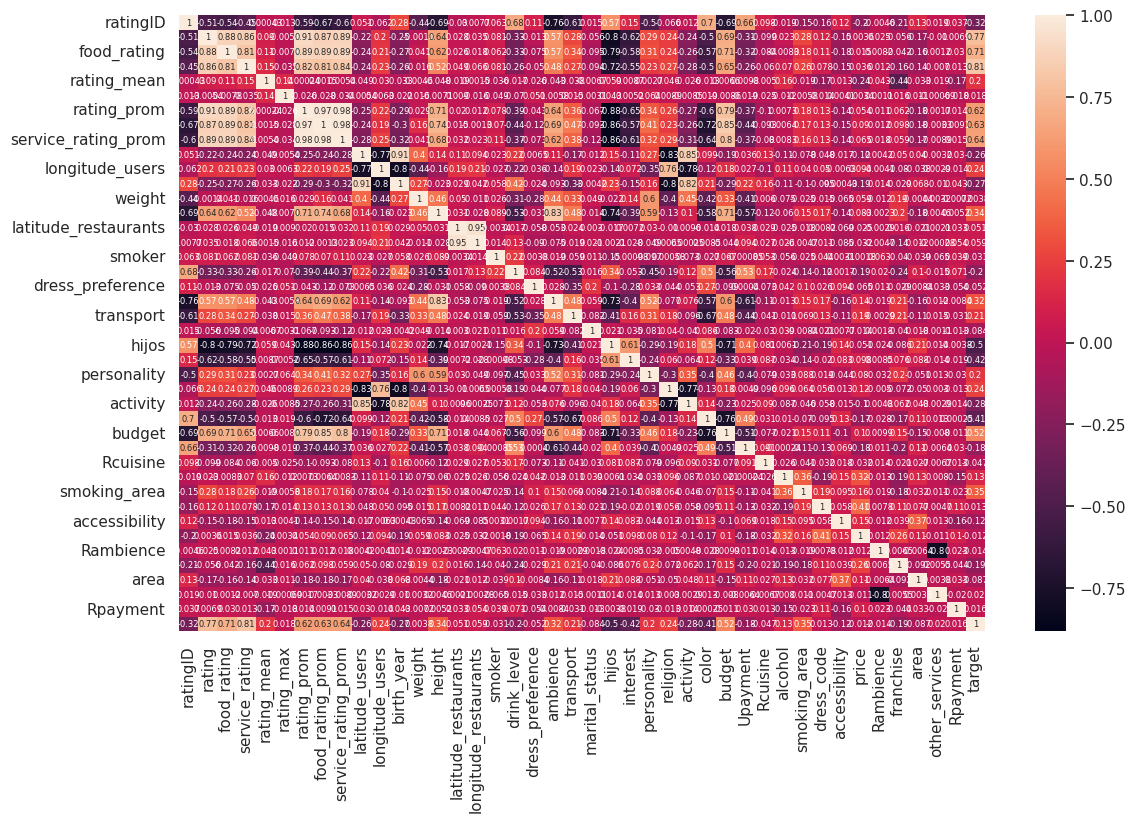

In [58]:
f.mapa_calor(df_iso)

In [59]:
X = df_iso.drop(columns='target')

In [60]:
mejor_variable=f.identificacion_1v_cluster(df_iso)

In [61]:
mejor_variable.columns

Index(['rating_prom', 'latitude_users', 'ratingID', 'Rambience',
       'accessibility', 'alcohol', 'dress_preference', 'rating_max', 'smoker',
       'Rcuisine', 'Rpayment', 'smoking_area', 'dress_code'],
      dtype='object')

In [62]:
f.identificacion_clusters(df_iso)

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,rating,0.903884,0.352500,0.148442
1,0,food_rating,0.871612,0.382718,0.207989
2,0,service_rating,0.808726,0.272753,0.263011
3,0,rating_prom,0.941256,0.473431,0.111560
4,0,food_rating_prom,0.909548,0.608064,0.230782
5,0,service_rating_prom,0.933591,0.472537,0.125903
6,0,hijos,0.775908,0.457432,0.413021
7,0,interest,0.469804,0.077511,0.574745
8,0,target,0.573001,0.148872,0.501686
9,1,latitude_users,0.889391,0.051897,0.116664


## Poder Predictivo con SelectKBest 

In [63]:
mejores = f.seleccionar_kbest(df_iso,"target",num_variables_deseadas=10)
mejores

['rating',
 'food_rating',
 'service_rating',
 'rating_prom',
 'food_rating_prom',
 'service_rating_prom',
 'hijos',
 'interest',
 'color',
 'budget']

# WOE e IV

Primero discretizamos las variables 

In [64]:
f.discretizar_variables(df_iso,X)

,ratingID,rating,food_rating,service_rating,rating_mean,rating_max,rating_prom,food_rating_prom,service_rating_prom,latitude_users,longitude_users,birth_year,weight,height,latitude_restaurants,longitude_restaurants,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,interest,personality,religion,activity,color,budget,Upayment,Rcuisine,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,Rpayment,target,C_ratingID,C_rating,C_food_rating,C_service_rating,C_rating_mean,C_rating_max,C_rating_prom,C_food_rating_prom,C_service_rating_prom,C_latitude_users,C_longitude_users,C_birth_year,C_weight,C_height,C_latitude_restaurants,C_longitude_restaurants,C_smoker,C_drink_level,C_dress_preference,C_ambience,C_transport,C_marital_status,C_hijos,C_interest,C_personality,C_religion,C_activity,C_color,C_budget,C_Upayment,C_Rcuisine,C_alcohol,C_smoking_area,C_dress_code,C_accessibility,C_price,C_Rambience,C_franchise,C_area,C_other_services,C_Rpayment
3,1,2.0,2.0,2.0,1.333333,2.0,1.400000,1.800000,1.600000,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.982680,0,2,0,0,2,0,2,3,3,0,1,1,2,4,67,1,1,2,1,2,0,0,0,1,6,1,"(-0.1, 111.0]","(1.8, 2.0]","(1.8, 2.0]","(1.8, 2.0]","(1.3, 1.475]","(1.9, 2.0]","(1.346, 1.538]","(1.6, 1.8]","(1.543, 1.736]","(21.798, 22.287]","(-101.057, -100.859]","(1985.8, 1992.0]","(61.6, 67.0]","(1.68, 1.76]","(22.125, 22.289]","(-101.03, -100.84]","(-0.001, 0.1]","(1.8, 2.0]","(-0.003, 0.3]","(-0.002, 0.2]","(1.8, 2.0]","(-0.002, 0.2]","(1.8, 2.0]","(2.8, 3.2]","(2.7, 3.0]","(-0.004, 0.4]","(0.9, 1.0]","(0.7, 1.4]","(1.8, 2.0]","(3.7, 4.0]","(61.2, 71.4]","(0.8, 1.0]","(0.8, 1.2]","(1.8, 2.0]","(0.8, 1.0]","(1.8, 2.0]","(-0.001, 0.1]","(-0.001, 0.1]","(-0.001, 0.1]","(0.8, 1.0]","(5.4, 6.0]"
4,1,2.0,2.0,2.0,1.333333,2.0,1.400000,1.800000,1.600000,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.982680,0,2,0,0,2,0,2,3,3,0,1,1,2,4,67,1,1,2,1,2,0,0,0,1,6,1,"(-0.1, 111.0]","(1.8, 2.0]","(1.8, 2.0]","(1.8, 2.0]","(1.3, 1.475]","(1.9, 2.0]","(1.346, 1.538]","(1.6, 1.8]","(1.543, 1.736]","(21.798, 22.287]","(-101.057, -100.859]","(1985.8, 1992.0]","(61.6, 67.0]","(1.68, 1.76]","(22.125, 22.289]","(-101.03, -100.84]","(-0.001, 0.1]","(1.8, 2.0]","(-0.003, 0.3]","(-0.002, 0.2]","(1.8, 2.0]","(-0.002, 0.2]","(1.8, 2.0]","(2.8, 3.2]","(2.7, 3.0]","(-0.004, 0.4]","(0.9, 1.0]","(0.7, 1.4]","(1.8, 2.0]","(3.7, 4.0]","(61.2, 71.4]","(0.8, 1.0]","(0.8, 1.2]","(1.8, 2.0]","(0.8, 1.0]","(1.8, 2.0]","(-0.001, 0.1]","(-0.001, 0.1]","(-0.001, 0.1]","(0.8, 1.0]","(5.4, 6.0]"
5,1,2.0,2.0,2.0,1.333333,2.0,1.400000,1.800000,1.600000,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.982680,0,2,0,0,2,0,2,3,3,0,1,1,2,4,67,1,1,2,1,2,0,0,0,1,6,1,"(-0.1, 111.0]","(1.8, 2.0]","(1.8, 2.0]","(1.8, 2.0]","(1.3, 1.475]","(1.9, 2.0]","(1.346, 1.538]","(1.6, 1.8]","(1.543, 1.736]","(21.798, 22.287]","(-101.057, -100.859]","(1985.8, 1992.0]","(61.6, 67.0]","(1.68, 1.76]","(22.125, 22.289]","(-101.03, -100.84]","(-0.001, 0.1]","(1.8, 2.0]","(-0.003, 0.3]","(-0.002, 0.2]","(1.8, 2.0]","(-0.002, 0.2]","(1.8, 2.0]","(2.8, 3.2]","(2.7, 3.0]","(-0.004, 0.4]","(0.9, 1.0]","(0.7, 1.4]","(1.8, 2.0]","(3.7, 4.0]","(61.2, 71.4]","(0.8, 1.0]","(0.8, 1.2]","(1.8, 2.0]","(0.8, 1.0]","(1.8, 2.0]","(-0.001, 0.1]","(-0.001, 0.1]","(-0.001, 0.1]","(0.8, 1.0]","(5.4, 6.0]"
6,1,2.0,2.0,2.0,1.333333,2.0,1.400000,1.800000,1.600000,22.156469,-100.985540,1987.0,65.0,1.71,22.150802,-100.982680,0,2,0,0,2,0,2,3,3,0,1,1,2,3,67,1,1,2,1,2,0,0,0,1,6,1,"(-0.1, 111.0]","(1.8, 2.0]","(1.8, 2.0]","(1.8, 2.0]","(1.3, 1.475]","(1.9, 2.0]","(1.346, 1.538]","(1.6, 1.8]","(1.543, 1.736]","(21.798, 22.287]","(-101.057, -100.859]","(1985.8, 1992.0]","(61.6, 67.0]","(1.68, 1.76]","(22.125, 22.289]","(-101.03, -100.84]","(-0.001, 0.1]","(1.8, 2.0]","(-0.003, 0.3]","(-0.002, 0.2]","(1.8, 2.0]","(-0.002, 0.2]","(1.8, 2.0]","(2.8, 3.2]","(2.7, 3.0]","(-0.004, 0.4]","(0.9, 1.0]","(0.7, 1.4]","(1.8, 2.0]","(2.8, 3.1]","(61.2, 71.4]"

Definimos el target y las variables que discretizamos

In [65]:
ls_discretized = [col for col in df_iso if col.startswith("C_")]
target="target"

In [66]:
f.ranking_iv(X,df_iso, 10,target,ls_discretized)

/home/aldogruiz/diplo/diplo/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

/home/aldogruiz/diplo/diplo/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

/home/aldogruiz/diplo/diplo/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

/home/aldogruiz/diplo/diplo/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

/home/aldogruiz/diplo/diplo/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

/home/aldogruiz/diplo/diplo/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

/home/aldogruiz/diplo/diplo/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

/home/aldogruiz/diplo/diplo

,iv
C_ratingID,inf
C_marital_status,inf
C_other_services,inf
C_rating,5.47313
C_service_rating,4.312858
C_food_rating_prom,3.142536
C_rating_prom,3.132291
C_color,3.084035
C_service_rating_prom,2.94574
C_latitude_users,2.914509


# Exportar dataframe

In [67]:
#df_iso.to_csv('datos_finales_restaurantes.csv', index=False)  